# Project 5 

Salary prediction using decision trees.

In [22]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

dir_path = "./"
df = pd.read_csv(os.path.join(dir_path, "data.csv"))

# Associated education to education enum
df_education = df[["education", "education-num"]].drop_duplicates()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=["object"]).columns:
    label_encoders[column] = (
        LabelEncoder()
    )  #  Transform non-numerical labels to numerical labels
    df[column] = label_encoders[column].fit_transform(df[column])

# Split features and target
X = df.drop(columns=["salary"])
y = df["salary"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


def predict_salary(data):
    new_df = pd.DataFrame(data)
    # Encode categorical variables
    label_encoders_2 = {}
    for column in new_df.select_dtypes(include=["object"]).columns:
        label_encoders_2[column] = LabelEncoder()
        new_df[column] = label_encoders[column].fit_transform(new_df[column])
    # Predict using the trained model
    prediction = model.predict(new_df)
    # Map predicted label to readable salary
    predicted_salary = "<=50K" if prediction[0] == 0 else ">50K"
    return predicted_salary

Accuracy: 0.8136035621065562


## Prediction 1

In [23]:
input_1 = {
    "age": [20],
    "workclass": ["Local-gov"],
    "fnlwgt": [125927],
    "education": ["7th-8th"],
    "education-num": [4],
    "marital-status": ["Never-married"],
    "occupation": ["Farming-fishing"],
    "relationship": ["Not-in-family"],
    "race": ["Asian-Pac-Islander"],
    "sex": ["Female"],
    "capital-gain": [1573],
    "capital-loss": [0],
    "hours-per-week": [35],
    "native-country": ["Cuba"],
}
print("Predicted salary 1:", predict_salary(input_1))

Predicted salary 1: <=50K


## Prediction 2

In [24]:
input_2 = {
    "age": [38],
    "workclass": ["Private"],
    "fnlwgt": [215646],
    "education": ["Masters"],
    "education-num": [14],
    "marital-status": ["Married-civ-spouse"],
    "occupation": ["Prof-specialty"],
    "relationship": ["NHusband"],
    "race": ["White"],
    "sex": ["Male"],
    "capital-gain": [14344],
    "capital-loss": [0],
    "hours-per-week": [48],
    "native-country": ["United-States"],
}

print("Predicted salary 2:", predict_salary(input_2))


Predicted salary 2: >50K


## Decision tree plot

[Text(0.5, 0.875, 'relationship <= 0.5\ngini = 0.366\nsamples = 26048\nvalue = [19778, 6270]'),
 Text(0.25, 0.625, 'education-num <= 12.5\ngini = 0.495\nsamples = 10603\nvalue = [5855, 4748]'),
 Text(0.125, 0.375, 'capital-gain <= 5095.5\ngini = 0.442\nsamples = 7420\nvalue = [4972, 2448]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'capital-gain <= 5095.5\ngini = 0.401\nsamples = 3183\nvalue = [883, 2300]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'capital-gain <= 7073.5\ngini = 0.178\nsamples = 15445\nvalue = [13923, 1522]'),
 Text(0.625, 0.375, 'relationship <= 4.5\ngini = 0.144\nsamples = 15093\nvalue = [13911, 1182]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'age <= 20.0\ngini = 0.066\nsamples = 352\nvalue = [12, 340]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

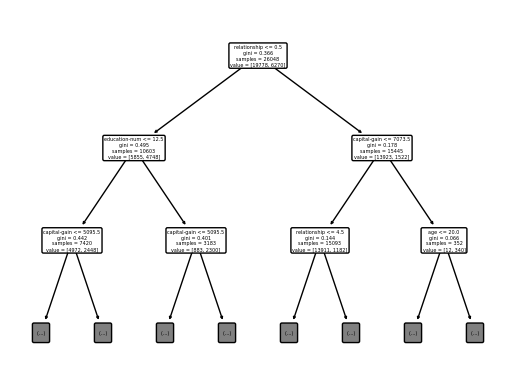

In [25]:
plot_tree(model, rounded=True, feature_names=X.columns, max_depth=2)

<Axes: xlabel='age', ylabel='Density'>

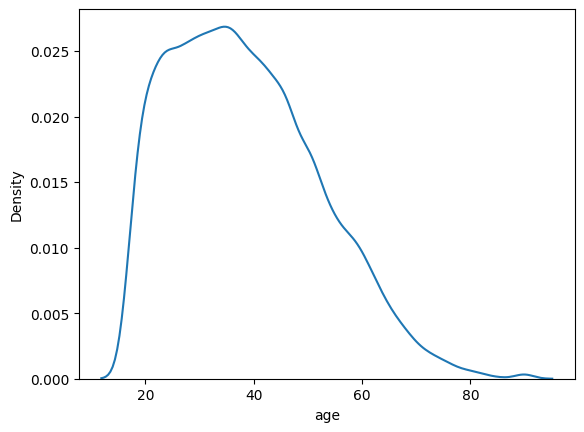

In [26]:
sns.kdeplot(df["age"])